In [1]:
import pandas as pd

import matplotlib.pyplot as plt

import math
import tensorflow as tf
import numpy as np
from numpy import unique
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import ModelCheckpoint, Callback, TensorBoard

In [2]:
data = pd.read_csv(r"C:\Users\49173\Desktop\Data\stockxf2.csv")
df = data.copy()

In [3]:
df

,productId,orderDate,salePrice,shoeSize,brand,sneakerName,colorway,retailPrice,releaseDate,salesThisPeriod,hype,days,collaboration
0,55a9ccfe-129a-438a-9989-b877c2a66279,2022-05-26,300,9.5,Jordan,Jordan 4 Retro Military Black,White/Black-Neutral Grey,210,2022-05-21,2476,10743,5,1
1,55a9ccfe-129a-438a-9989-b877c2a66279,2022-05-26,300,9.0,Jordan,Jordan 4 Retro Military Black,White/Black-Neutral Grey,210,2022-05-21,2476,10743,5,1
2,55a9ccfe-129a-438a-9989-b877c2a66279,2022-05-26,382,10.0,Jordan,Jordan 4 Retro Military Black,White/Black-Neutral Grey,210,2022-05-21,2476,10743,5,1
3,55a9ccfe-129a-438a-9989-b877c2a66279,2022-05-26,304,8.0,Jordan,Jordan 4 Retro Military Black,White/Black-Neutral Grey,210,2022-05-21,2476,10743,5,1
4,55a9ccfe-129a-438a-9989-b877c2a66279,2022-05-26,390,12.0,Jordan,Jordan 4 Retro Military Black,White/Black-Neutral Grey,210,2022-05-21,2476,10743,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
192880,3774e829-99f4-46d6-bb94-f9e19ad55ad3,2022-03-18,384,10.0,adidas,adidas Yeezy Boost 350 V2 Sesame,Sesame/Sesame/Sesame,220,2018-11-23,13,5366,1211,1
192881,3774e829-99f4-46d6-bb94-f9e19ad55ad3,2022-03-18,366,12.0,adidas,adidas Yeezy Boost 350 V2 Sesame,Sesame/Sesame/Sesame,220,2018-11-23,13,5366,1211,1
192882,3774e829-99f4-46d6-bb94-f9e19ad55ad3,2022-03-18,420,10.5,adidas,adidas Yeezy Boost 350 V2 Sesame,Sesame/Sesame/Sesame,220,2018-11-23,13,5366,1211,1
192883,3774e829-99f4-46d6-bb94-f9e19ad55ad3,2022-03-18,357,11.0,adidas,adidas Yeezy Boost 350 V2 Sesame,Sesame/Sesame/Sesame,220,2018-11-23,13,5366,1211,1


In [4]:
df['log_hype'] = np.log(df['hype']+1)
df['log_resalePrice'] = np.log(df['salePrice'])

In [5]:
df = df.drop(['productId', 
              'orderDate',
              'sneakerName',
              'colorway', 
              'releaseDate', 
              "hype", 
              'salePrice'],
              axis = 1)

In [6]:
df

,shoeSize,brand,retailPrice,salesThisPeriod,days,collaboration,log_hype,log_resalePrice
0,9.5,Jordan,210,2476,5,1,9.282103,5.703782
1,9.0,Jordan,210,2476,5,1,9.282103,5.703782
2,10.0,Jordan,210,2476,5,1,9.282103,5.945421
3,8.0,Jordan,210,2476,5,1,9.282103,5.717028
4,12.0,Jordan,210,2476,5,1,9.282103,5.966147
...,...,...,...,...,...,...,...,...
192880,10.0,adidas,220,13,1211,1,8.588024,5.950643
192881,12.0,adidas,220,13,1211,1,8.588024,5.902633
192882,10.5,adidas,220,13,1211,1,8.588024,6.040255
192883,11.0,adidas,220,13,1211,1,8.588024,5.877736


In [7]:
df2 = pd.get_dummies(df["brand"], prefix='brand')

In [8]:
df = df.drop(['brand'], axis = 1)

In [9]:
# df3 = pd.get_dummies(df["sneakerName"], prefix='SN')

In [10]:
# df = df.drop(['sneakerName'], axis = 1)

In [11]:
df

,shoeSize,retailPrice,salesThisPeriod,days,collaboration,log_hype,log_resalePrice
0,9.5,210,2476,5,1,9.282103,5.703782
1,9.0,210,2476,5,1,9.282103,5.703782
2,10.0,210,2476,5,1,9.282103,5.945421
3,8.0,210,2476,5,1,9.282103,5.717028
4,12.0,210,2476,5,1,9.282103,5.966147
...,...,...,...,...,...,...,...
192880,10.0,220,13,1211,1,8.588024,5.950643
192881,12.0,220,13,1211,1,8.588024,5.902633
192882,10.5,220,13,1211,1,8.588024,6.040255
192883,11.0,220,13,1211,1,8.588024,5.877736


In [12]:
df = df.join(df2)

In [13]:
# df = df.join(df3)

In [14]:
df

,shoeSize,retailPrice,salesThisPeriod,days,collaboration,log_hype,log_resalePrice,brand_Alexander McQueen,brand_BAPE,brand_Common Projects,...,brand_Jordan,brand_MSCHF,brand_New Balance,brand_Nike,brand_Puma,brand_Reebok,brand_Salomon,brand_Under Armour,brand_Vans,brand_adidas
0,9.5,210,2476,5,1,9.282103,5.703782,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,9.0,210,2476,5,1,9.282103,5.703782,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,10.0,210,2476,5,1,9.282103,5.945421,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,8.0,210,2476,5,1,9.282103,5.717028,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,12.0,210,2476,5,1,9.282103,5.966147,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192880,10.0,220,13,1211,1,8.588024,5.950643,0,0,0,...,0,0,0,0,0,0,0,0,0,1
192881,12.0,220,13,1211,1,8.588024,5.902633,0,0,0,...,0,0,0,0,0,0,0,0,0,1
192882,10.5,220,13,1211,1,8.588024,6.040255,0,0,0,...,0,0,0,0,0,0,0,0,0,1
192883,11.0,220,13,1211,1,8.588024,5.877736,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [15]:
dfnames = df.copy()
dfnames = dfnames.drop(['log_resalePrice'], axis = 1)

columns = dfnames.columns.tolist()
columns.insert(0, 'constant')
print(columns)

['constant', 'shoeSize', 'retailPrice', 'salesThisPeriod', 'days', 'collaboration', 'log_hype', 'brand_Alexander McQueen', 'brand_BAPE', 'brand_Common Projects', 'brand_Converse', 'brand_Crocs', 'brand_Jordan', 'brand_MSCHF', 'brand_New Balance', 'brand_Nike', 'brand_Puma', 'brand_Reebok', 'brand_Salomon', 'brand_Under Armour', 'brand_Vans', 'brand_adidas']


In [16]:
X = df.drop('log_resalePrice',axis =1).values
y = df['log_resalePrice'].values

#splitting Train and Test 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [17]:
s_scaler = StandardScaler()
X_train = s_scaler.fit_transform(X_train.astype(np.float))
X_test = s_scaler.transform(X_test.astype(np.float))

C:\Users\49173\AppData\Local\Temp\ipykernel_20496\2855883272.py:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X_train = s_scaler.fit_transform(X_train.astype(np.float))
C:\Users\49173\AppData\Local\Temp\ipykernel_20496\2855883272.py:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X_test = s_scaler.transform(X_test.astype(np.float))


In [18]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(algorithm='brute')

In [19]:
knn.fit(X_train,y_train)

KNeighborsRegressor(algorithm='brute')

In [20]:
predictions = knn.predict(X_test)

In [21]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))  
print('MSE:', metrics.mean_squared_error(y_test, predictions))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('VarScore:',metrics.explained_variance_score(y_test,predictions))

MAE: 0.08688798644729026
MSE: 0.01637775192104594
RMSE: 0.12797559111426654
VarScore: 0.9279817491107695


In [22]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, predictions)
rmse = mse ** (1/2)
print(rmse)

0.12797559111426654


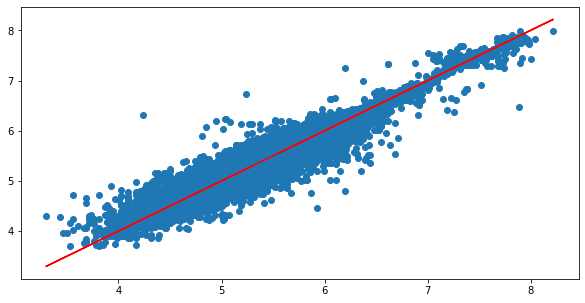

In [23]:
# Visualizing Our predictions
fig = plt.figure(figsize=(10,5))
plt.scatter(y_test,predictions)
# Perfect predictions
plt.plot(y_test,y_test,'r')

In [24]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})
df1 = df.head(20)
df1

,Actual,Predicted
0,5.560682,5.543000
1,5.886104,5.939033
2,4.700480,4.725004
3,5.645447,5.428021
4,4.356709,4.356709
5,4.394449,4.434344
6,5.545177,5.777989
7,4.919981,4.864608
8,5.298317,5.336642
9,5.337538,5.439007
